In [1]:
import  numpy as np
import  matplotlib
from    matplotlib import pyplot as plt
# Default parameters for plots
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.titlesize'] = 20
matplotlib.rcParams['figure.figsize'] = [9, 7]
matplotlib.rcParams['font.family'] = ['STKaiti']
matplotlib.rcParams['axes.unicode_minus']=False 

import tensorflow as tf
import timeit

cpu_data = []
gpu_data = []

for n in range(9):
    n = 10**n
    # 创建在CPU上运算的2个矩阵
    with tf.device('/cpu:0'):
        cpu_a = tf.random.normal([1, n])
        cpu_b = tf.random.normal([n, 1])
        print(cpu_a.device, cpu_b.device)
    # 创建使用GPU运算的2个矩阵
    with tf.device('/gpu:0'):
        gpu_a = tf.random.normal([1, n])
        gpu_b = tf.random.normal([n, 1])
        print(gpu_a.device, gpu_b.device)

    def cpu_run():
        with tf.device('/cpu:0'):
            c = tf.matmul(cpu_a, cpu_b)
        return c 

    def gpu_run():
        with tf.device('/gpu:0'):
            c = tf.matmul(gpu_a, gpu_b)
        return c 

    # 第一次计算需要热身，避免将初始化阶段时间结算在内
    cpu_time = timeit.timeit(cpu_run, number=10)
    gpu_time = timeit.timeit(gpu_run, number=10)
    print('warmup:', cpu_time, gpu_time)
    # 正式计算10次，取平均时间
    cpu_time = timeit.timeit(cpu_run, number=10)
    gpu_time = timeit.timeit(gpu_run, number=10)
    print('run time:', cpu_time, gpu_time)
    cpu_data.append(cpu_time/10)
    gpu_data.append(gpu_time/10)

    del cpu_a,cpu_b,gpu_a,gpu_b

/job:localhost/replica:0/task:0/device:CPU:0 /job:localhost/replica:0/task:0/device:CPU:0
/job:localhost/replica:0/task:0/device:GPU:0 /job:localhost/replica:0/task:0/device:GPU:0
warmup: 0.036287689999994654 2.1770583599999327
run time: 0.0031470789999730187 0.001189327999895795
/job:localhost/replica:0/task:0/device:CPU:0 /job:localhost/replica:0/task:0/device:CPU:0
/job:localhost/replica:0/task:0/device:GPU:0 /job:localhost/replica:0/task:0/device:GPU:0
warmup: 0.0022266869999612027 0.01199319399995602
run time: 0.0027426479999803632 0.0011745169999812788
/job:localhost/replica:0/task:0/device:CPU:0 /job:localhost/replica:0/task:0/device:CPU:0
/job:localhost/replica:0/task:0/device:GPU:0 /job:localhost/replica:0/task:0/device:GPU:0
warmup: 0.0021581400000059148 0.0012371020000045974
run time: 0.0028506209999932253 0.0011565380000320147
/job:localhost/replica:0/task:0/device:CPU:0 /job:localhost/replica:0/task:0/device:CPU:0
/job:localhost/replica:0/task:0/device:GPU:0 /job:localhost

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  # This is added back by InteractiveShellApp.init_path()
findfont: Font family ['STKaiti'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30697 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38453 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22823 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23567 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/

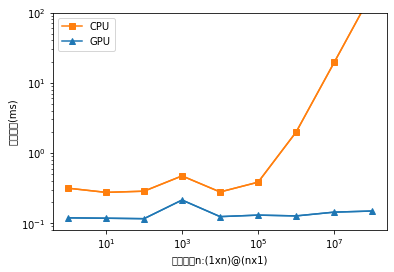

In [2]:
x = [10**i for i in range(9)]
cpu_data = [1000*i for i in cpu_data]
gpu_data = [1000*i for i in gpu_data]
plt.plot(x, cpu_data, 'C1')
plt.plot(x, cpu_data, color='C1', marker='s', label='CPU')
plt.plot(x, gpu_data,'C0')
plt.plot(x, gpu_data, color='C0', marker='^', label='GPU')

plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.ylim([0,100])
plt.xlabel('矩阵大小n:(1xn)@(nx1)')
plt.ylabel('运算时间(ms)')
plt.legend()
plt.show()